<div style="line-height:0.5">
<h1 style="color:slateblue"> Matplotlib trials 2 </h1>
</div>
<div style="margin-top: -13px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3>
    colors + fonts, peaks, barplot, draw trees with networkx, savefig</span>
</div>
</div> 

### Avaible colors:      
<div style="margin-top: -10px;">
1. Shades of White and Beige:
<div style="margin-top: -10px;">
</div>

   - aliceblue
   - antiquewhite
   - azure
   - beige
   - bisque
   - blanchedalmond
   - cornsilk
   - floralwhite
   - ghostwhite
   - honeydew
   - ivory
   - linen
   - mintcream
   - mistyrose
   - moccasin
   - navajowhite
   - oldlace
   - papayawhip
   - peachpuff
   - seashell
   - snow
   - thistle
   - wheat
   - white
   - whitesmoke
</div>   
2. Shades of Gray:
<div style="margin-top: -24px;">
</div>

   - darkgray
   - darkgrey
   - gainsboro
   - lightgray
   - lightgrey
   - silver
</div>

3. Shades of Black:
<div style="margin-top: -15px;">
</div>

   - black
</div>

4. Shades of Red:
<div style="margin-top: -15px;">
</div>

   - indianred
   - lightcoral
   - salmon
   - darksalmon
   - lightsalmon
   - crimson
   - red
   - firebrick
   - darkred
   - maroon
   - rosybrown
   - tomato   
</div>

5. Shades of Pink:
<div style="margin-top: -15px;">
</div>

   - pink
   - lightpink
   - hotpink
   - deeppink
   - palevioletred
   - mediumvioletred
</div>

6. Shades of Orange:
<div style="margin-top: -15px;">
</div>

   - lightsalmon
   - coral
   - tomato
   - orangered
   - darkorange
   - orange
</div>

7. Shades of Brown:
<div style="margin-top: -10px;">
</div>

   - saddlebrown
   - chocolate
   - peru
   - sandybrown
   - burlywood
   - tan
   - rosybrown
   - sienna
   - brown
   - maroon
</div>

8. Shades of Yellow:
<div style="margin-top: -15px;">
</div>

   - gold
   - khaki
   - darkkhaki
   - yellow
   - lightyellow
   - lemonchiffon
   - palegoldenrod
   - moccasin
   - papayawhip
   - peachpuff
   - yellowgreen
</div>

9. Shades of Green:
<div style="margin-top: -15px;">
</div>

   - greenyellow
   - chartreuse
   - lawngreen
   - lime
   - limegreen
   - palegreen
   - lightgreen
   - mediumspringgreen
   - springgreen
   - mediumseagreen
   - seagreen
   - forestgreen
   - green
   - darkgreen
   - yellowgreen
   - olive
   - olivedrab
   - darkolivegreen
</div>

10. Shades of Cyan:
<div style="margin-top: -15px;">
</div>

   - lightcyan
   - cyan
   - aqua
   - aquamarine
   - mediumaquamarine
   - paleturquoise
   - turquoise
   - mediumturquoise
   - darkturquoise
   - lightseagreen
   - darkcyan
   - teal
</div>

11. Shades of Blue:
<div style="margin-top: -15px;">
</div>

   - cadetblue
   - steelblue
   - lightsteelblue
   - powderblue
   - lightblue
   - lightskyblue
   - skyblue
   - deepskyblue
   - dodgerblue
   - cornflowerblue
   - mediumslateblue
   - royalblue
   - blue
   - mediumblue
   - darkblue
   - navy
   - midnightblue
</div>

12. Shades of Purple:
<div style="margin-top: -15px;">
</div>

   - lavender
   - thistle
   - plum
   - violet
   - orchid
   - fuchsia
   - magenta
   - mediumorchid
   - mediumpurple
   - blueviolet
   - darkviolet
   - darkorchid
   - darkmagenta
   - purple
   - rebeccapurple
</div>


In [6]:
import sys
from contextlib import redirect_stdout

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt         #from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.font_manager as fm
from mpl_toolkits.mplot3d import axes3d

In [2]:
""" List of available font names. """
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
for font in font_list[:3]:
    print(font)

/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf
/usr/share/fonts/truetype/lato/Lato-SemiboldItalic.ttf
/usr/share/fonts/truetype/malayalam/RaghuMalayalamSans-Regular.ttf


In [8]:
%%script echo Skip. Store the "fonts" list into a file
output_file = "all_fonts_output.txt"
with open(output_file, "w") as f:
    with redirect_stdout(f):
        for font in font_list:
            print(font)

Skip. Store the fonts list into a file


## 1) Example

In [3]:
def peaks(ar):
    """ Find peaks (local maxima) in the input array along with their indices and lengths.

    Args:
        Input array ar [list]

    Yields:
        Tuple containing the previous peak element, its index, and the length of the increasing sequence.
    """
    # Calculate the differences between consecutive elements of the input array
    di = np.diff(ar)
    # Calculate the signs of the differences
    si = np.sign(np.diff(ar))
    i, up, cont = 0, False, 0
    for j in range(1, len(ar)):
        # Get the previous and current elements
        prev, val = ar[j-1], ar[j]
        if up and val < prev:
            yield prev, i, cont
            # Reset the flag for increasing sequence and the length counter
            up = False
            cont = 0
        if val > prev or (val == prev and cont!=0):
            cont += 1
            # Update the index and set the flag for increasing sequence
            i, up = j, True
        # Check if the last element is part of an increasing sequence
        if up and j == len(ar)-1:
            yield prev, i, cont       

In [4]:
def valleys(ar):
    """ Find valleys (local minima) in the input array along with their indices and lengths.

    Args:
        Input array [list]

    Yields:
        Tuple containing the current valley element, its index, and the length of the decreasing sequence
    """    
    i, down, cont = 0, False, 0
    for j in range(1, len(ar)):
        prev, val = ar[j-1], ar[j]
        # Check if the current element is greater than the previous element or equal with a non-zero length counter
        if down and val > prev or (val == prev and cont!=0):
            yield val, i, cont
            # Reset the flag for decreasing sequence and the length counter
            down= False
            cont=0
        if val < prev:
            cont+=1
            # Update the index and set the flag for decreasing sequence
            i, down = j, True
        # Check if the last element is part of a decreasing sequence            
        if down and j == len(ar)-1:
            yield val, i, cont             

In [5]:
a1 = [2,3,3,2,2,2,3,3,2,2,4,4,4,4,4,2,2]
list(peaks(a1))

[(3, 2, 2), (3, 7, 2), (4, 14, 5)]

In [6]:
a2 = [1,2,3,4,5,6,7,8,9,10]
list(peaks(a2))

[(9, 9, 9)]

In [7]:
a3 = [5,4,3,2,2,3,3,5,5,5,2,1,3,3,2,4,2,4,4,4,4,4,2,2,6,6,6,6,6,6,6,5]
p = peaks(a3)
v = valleys(a3)

list(v)


[(2, 3, 3), (3, 11, 2), (4, 14, 1), (4, 16, 1), (2, 22, 1), (5, 31, 1)]

In [8]:
a3 = [6,6,6,2,2,3,3,5,5,5,2,1,3,3,2,4,2,4,4,4,4,4,2,2,6,6,6]

arr = []
p =peaks(a3)
for a,b,c in p:
    arr = np.append(arr,c)
arr

array([5., 2., 1., 5., 3.])

In [9]:
arr = arr.astype('int64') 
arr = np.array(arr)

n_peaks = np.zeros(5, dtype=int)

for i in arr:
    if i==1:
        n_peaks[0]+=1
    elif i==2:
        n_peaks[1]+=1
    elif i==3:
        n_peaks[2]+=1
    elif i==4:
        n_peaks[3]+=1
    elif i>=5:
        n_peaks[4]+=1

n_peaks        

array([1, 1, 1, 0, 2])

In [10]:
a0 = [2,3,4,5,6]
a1 = [2,3,3,2,2]
a2 = [3,2,2,3,4]
a3 = [3,5,5,6,6]
first = False 
second = False
ciao = 0

for i in range(len(a1) - 1):
    if a1[i] < a1[i+1]:
        first = True
        second = False
        ciao+=1
        print(first, second, ciao)
    else:
        first = False
        second = True
        print(first, second, ciao)

True False 1
False True 1
False True 1
False True 1


In [11]:
def detect_peaks(signal, threshold, window_size):
    peaks = []
    for i in range(window_size, len(signal) - window_size):
        if signal[i] > threshold:
            if signal[i] == np.max(signal[i-window_size:i+window_size+1]):
                peaks.append(i)
    return peaks

## 2) various plots for same signal

In [12]:
signal = np.array([0.1, 0.5, 1.0, 0.8, 0.3, 0.1, 0.2, 0.4, 0.6, 0.9, 1.2, 0.7, 0.2, 0.1, 0.3, 
                0.6, 0.9, 0.6, 0.3, 0.0, -0.2, 0.1, 0.3, 0.5, 0.3, 0.1, 0.0, -0.1, 0.2, 0.4])

## Threshold and window size
threshold = 0.5
window_size = 3

## Peak detection 
peaks = detect_peaks(signal, threshold, window_size)

print("peaks at positions: {}".format(peaks))

peaks at positions: [10, 16]


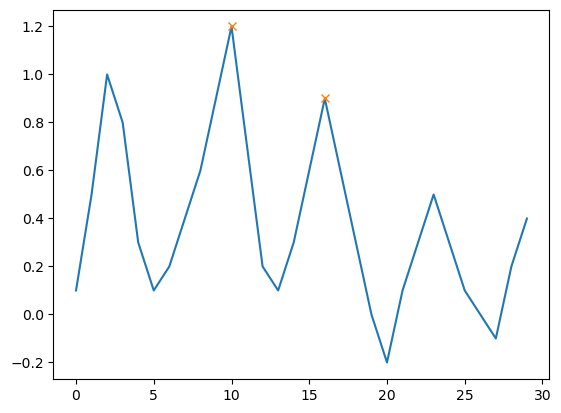

In [13]:
# Plot
plt.plot(signal)
plt.plot(peaks, signal[peaks], "x")
plt.show()

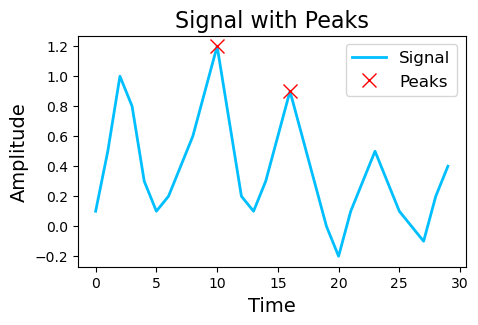

In [14]:
""" Plot peaks 2 """
## Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(5, 3))
## Set plot parameters and add legend
ax.plot(signal, color="deepskyblue", linewidth=2, label="Signal")
ax.plot(peaks, signal[peaks], "x", color="red", markersize=10, label="Peaks")
ax.legend(fontsize=12)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Amplitude", fontsize=14)
ax.set_title("Signal with Peaks", fontsize=16);

In [15]:
""" Saving a plot to a file """
fig.savefig("./images_matplotlib/line_plot_test_save.png", dpi=300)

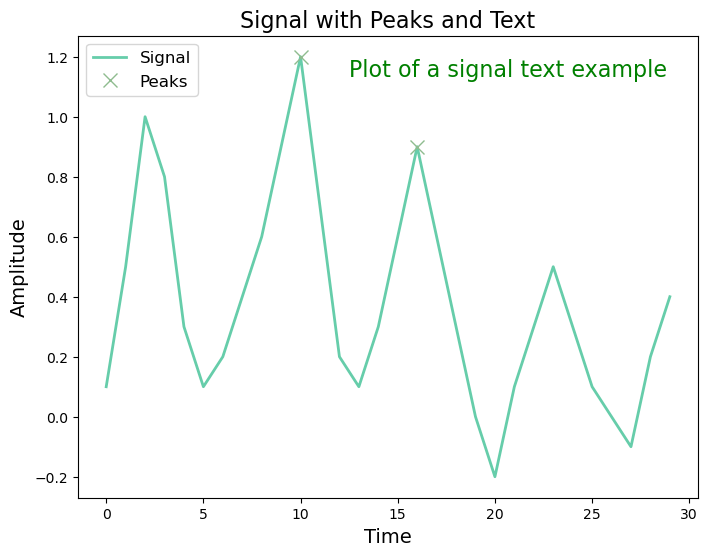

In [16]:
## Set plot parameters and add legend
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(signal, color="mediumaquamarine", linewidth=2, label="Signal")
ax.plot(peaks, signal[peaks], "x", color="darkseagreen", markersize=10, label="Peaks")
legend = ax.legend(loc="upper left", fontsize=12)

## Add text
## ha ==> left", "center", "right", "left_baseline", "center_baseline", "right_baseline"
text = "Plot of a signal text example"
ax.text(0.95, 0.95, text, transform=ax.transAxes, color="green", fontsize=16, ha="right", va="top") #ha = "center" --> 0.5, 0.95,

## Set x- and y-axis labels and title
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Amplitude", fontsize=14)
ax.set_title("Signal with Peaks and Text", fontsize=16)

## Set legend color
for text in legend.get_texts():
    text.set_color("black")

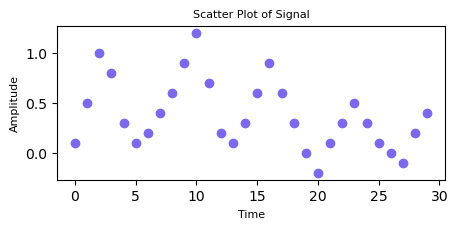

In [17]:
## Scatter plot
fig, ax = plt.subplots(figsize=(5, 2))
ax.scatter(np.arange(len(signal)), signal, color="mediumslateblue")
ax.set_xlabel("Time", fontsize=8)
ax.set_ylabel("Amplitude", fontsize=8)
ax.set_title("Scatter Plot of Signal", fontsize=8)
plt.show()

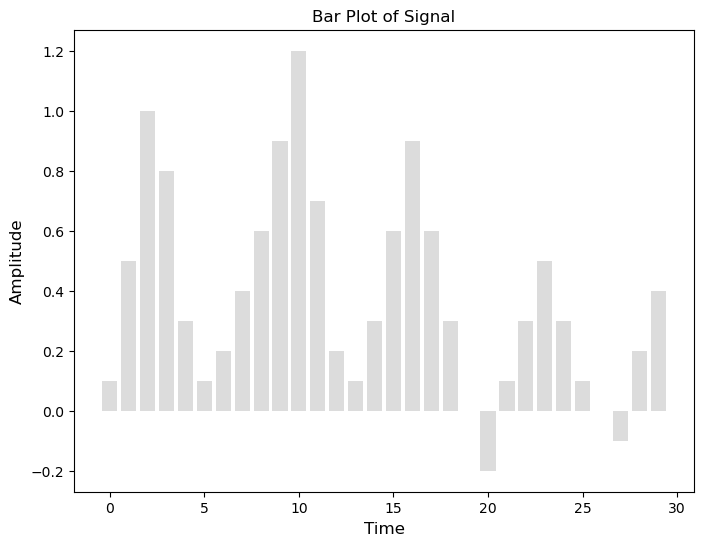

In [18]:
## Bar plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(np.arange(len(signal)), signal, color="gainsboro")
ax.set_xlabel("Time", fontsize=12)
ax.set_ylabel("Amplitude", fontsize=12)
ax.set_title("Bar Plot of Signal", fontsize=12)
plt.show()

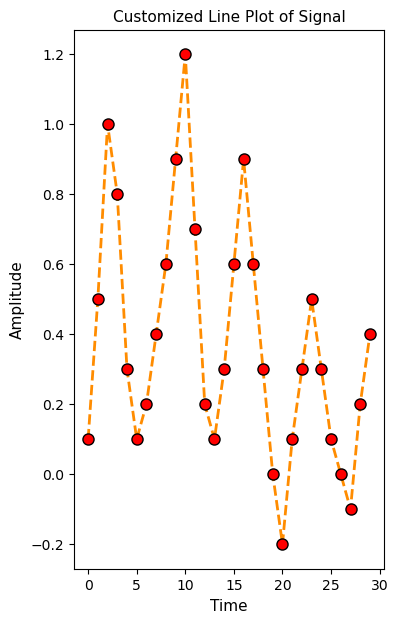

In [19]:
## Customizing plot appearance
fig, ax = plt.subplots(figsize=(4, 7))
ax.plot(signal, color="darkorange", linewidth=2, linestyle="dashed", marker="o", markersize=8, markerfacecolor="red", markeredgecolor="black")
ax.set_xlabel("Time", fontsize=11)
ax.set_ylabel("Amplitude", fontsize=11)
ax.set_title("Customized Line Plot of Signal", fontsize=11);

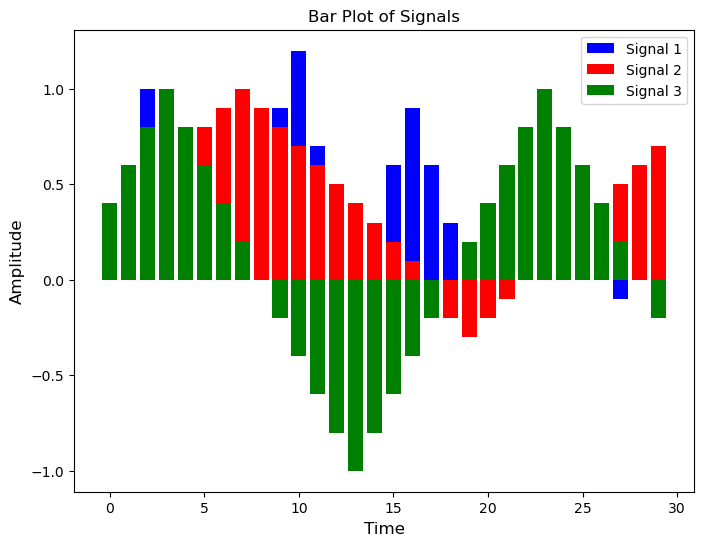

In [20]:
##Test signals
signal1 = np.array([0.1, 0.5, 1.0, 0.8, 0.3, 0.1, 0.2, 0.4, 0.6, 0.9, 1.2, 0.7, 0.2, 0.1, 0.3, 0.6, 0.9, 0.6, 0.3, 0.0,
                    -0.2, 0.1, 0.3, 0.5, 0.3, 0.1, 0.0, -0.1, 0.2, 0.4])
signal2 = np.array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, -0.1, -0.2, -0.3,
                    -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
signal3 = np.array([0.4, 0.6, 0.8, 1.0, 0.8, 0.6, 0.4, 0.2, 0.0, -0.2, -0.4, -0.6, -0.8, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2,
                    0.4, 0.6, 0.8, 1.0, 0.8, 0.6, 0.4, 0.2, 0.0, -0.2])

## Bar plot of all 3
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(np.arange(len(signal1)), signal1, color="blue", label="Signal 1")
ax.bar(np.arange(len(signal2)), signal2, color="red", label="Signal 2")
ax.bar(np.arange(len(signal3)), signal3, color="green", label="Signal 3")
ax.set_xlabel("Time", fontsize=12)
ax.set_ylabel("Amplitude", fontsize=12)
ax.set_title("Bar Plot of Signals", fontsize=12)
ax.legend()
plt.show()

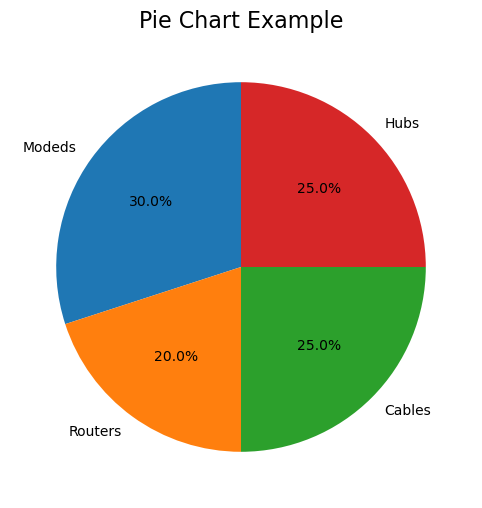

In [21]:
""" Pie chart """
fig, ax = plt.subplots(figsize=(8, 6))
labels = ["Modeds", "Routers", "Cables", "Hubs"]
sizes = [30, 20, 25, 25]
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.set_title("Pie Chart Example", fontsize=16)
plt.show()

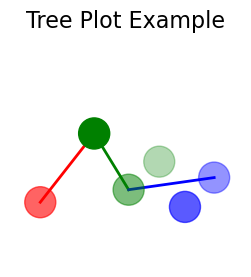

In [22]:
""" Tree plot """
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Tree Plot Example", fontsize=16)
ax.set_axis_off()

## Tree structure
x = [0, 1, 1, 1, 2, 2]
y = [0, 0, 1, 2, 1, 2]
z = [0, 1, 0, 0, 0, 0]
c = ['r', 'g', 'g', 'g', 'b', 'b']

## Plot
ax.scatter(x, y, z, c=c, s=500, marker='o')
ax.plot([0, 1], [0, 0], [0, 1], c='r', linewidth=2)
ax.plot([1, 1], [0, 1], [1, 0], c='g', linewidth=2)
ax.plot([1, 2], [1, 2], [0, 0], c='b', linewidth=2)

plt.show()

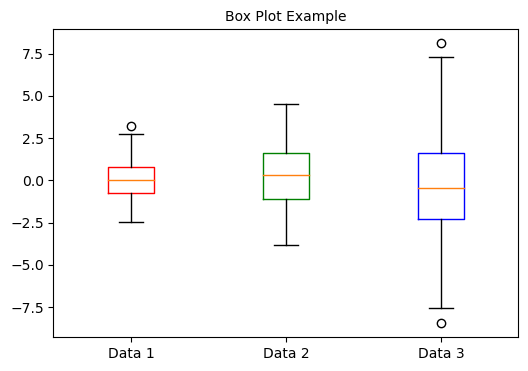

In [23]:
""" Box (Whisker plot) """
fig, ax = plt.subplots(figsize=(6, 4))
databox = [np.random.normal(0, std, 100) for std in range(1, 4)]
bp = ax.boxplot(databox)
# To color each box assign boxplot to bp
#ax.boxplot(databox)

colors = ['red', 'green', 'blue']
for patch, color in zip(bp['boxes'], colors):
    patch.set_color(color)

ax.set_xticklabels(['Data 1', 'Data 2', 'Data 3'])
ax.set_title("Box Plot Example", fontsize=10)
plt.show()

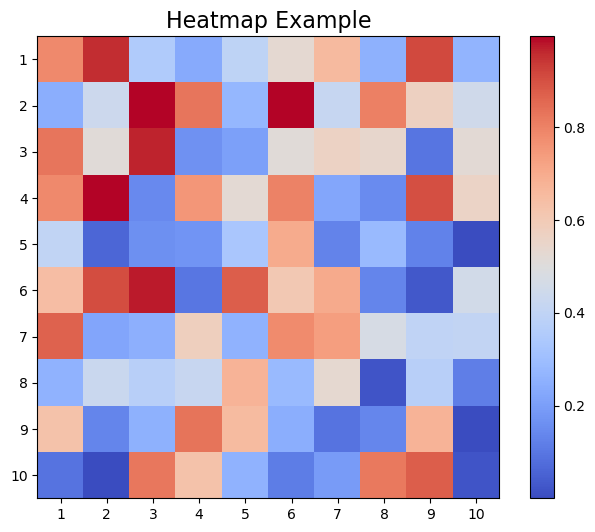

In [24]:
""" Heatmap """
fig, ax = plt.subplots(figsize=(8, 6))
data = np.random.rand(10, 10)
cax = ax.imshow(data, cmap='coolwarm')
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
ax.set_xticklabels(np.arange(1, 11))
ax.set_yticklabels(np.arange(1, 11))
ax.set_title("Heatmap Example", fontsize=16)
fig.colorbar(cax)
plt.show()

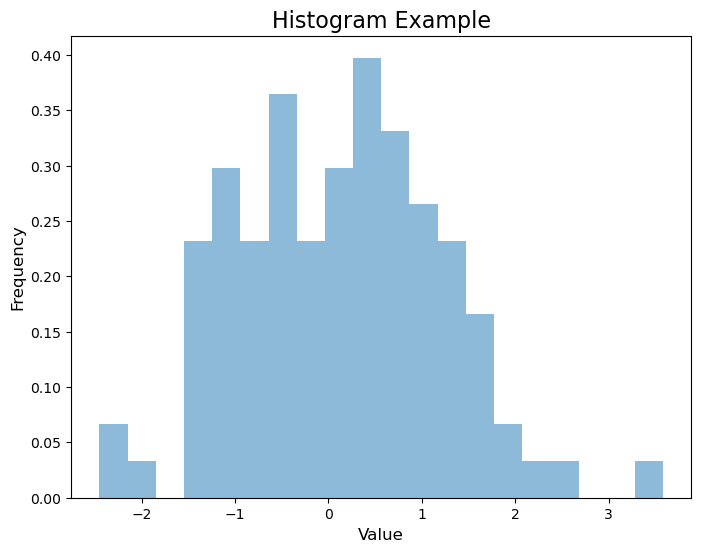

In [25]:
""" Histogram """
fig, ax = plt.subplots(figsize=(8, 6))
data = np.random.normal(size=100)
ax.hist(data, bins=20, density=True, alpha=0.5)
ax.set_xlabel("Value", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.set_title("Histogram Example", fontsize=16)
plt.show()

## 3) Trees
Due to the stochastic nature of NetworkX, the graph layout may vary slightly each time it is run, even on the same graph structure, 
since NetworkX uses a force-directed spring layout algorithm by default.

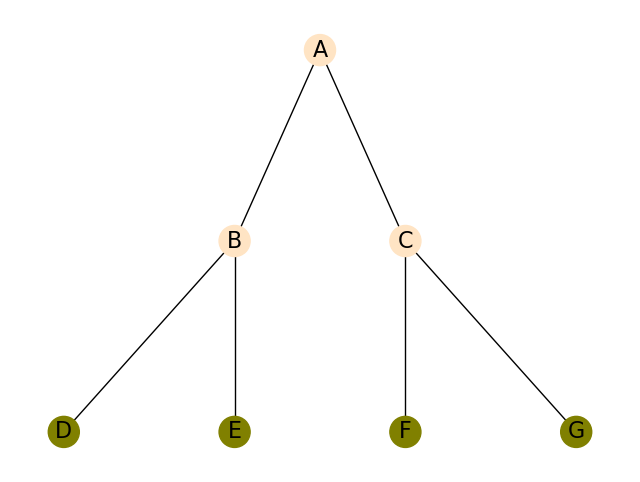

In [26]:
""" Binary tree """
# Structure
edges = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6)]
labels = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G'}

# Graph and plot the tree
fig, ax = plt.subplots(figsize=(8, 6))
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')

## Node size and color
node_size = 500
node_color = ['olive' if i in [3, 4, 5, 6] else 'bisque' for i in G.nodes()]

#nx.draw(G, pos, with_labels=False, arrows=False)    #use nx.draw_networkx to avoid the error => TypeError: '_AxesStack' object is not callable
nx.draw_networkx(G, pos, with_labels=False, arrows=False, node_size=node_size, node_color=node_color)

for i in pos:
    x, y = pos[i]
    ax.text(x, y, labels[i], ha='center', va='center', fontsize=16)

ax.set_axis_off()

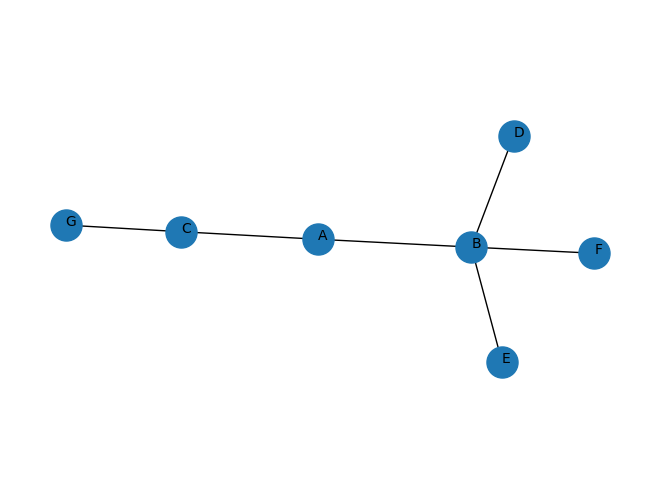

In [27]:
# Define tree structure as edges and node labels 
edges = [(0,1), (0,2), (1,3), (1,4), (1,5), (2,6)]
labels = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G'} 

# Create graph and set positions
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G) 

# Draw graph
nx.draw(G, pos, node_size=500)

# Add labels 
for i,p in pos.items():
    x,y = p
    plt.text(x, y, labels[i], fontsize=10)

plt.axis('equal')
plt.show()

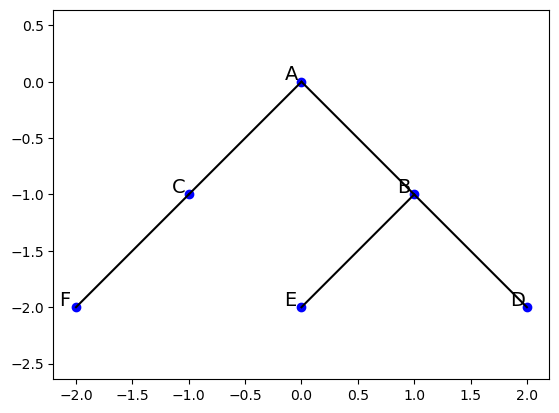

In [28]:
# Define tree with edges and positions
edges = [(0,1), (0,2), (1,3), (1,4), (2,5)]
positions = {0:(0,0), 1:(1,1), 2:(1,-1), 3:(2,2), 4:(2,0), 5:(2,-2)}

rotated_positions = {node: (pos[1], -pos[0]) 
                for node, pos in positions.items()}

# Labels
labels = {0:"A", 1:"B", 2:"C", 3:"D", 4:"E", 5:"F"}

offset = 0.15

# # Plot nodes at rotated positions  
# for node, coord in rotated_positions.items():
#     x,y = coord
#     plt.plot(x,y, "ko")
#     plt.text(x, y, labels[node], fontsize=14, ha="center", va="center") 
# 


for node, pos in rotated_positions.items():

    x, y = pos
    
    # Offset label position
    text_x = x - offset
    text_y = y + offset  
    plt.text(text_x, text_y, labels[node], 
            fontsize=14, ha="left", va="top")
    plt.plot(x, y, "bo") #"bo" instead of "o", color='blue')

# Plot edges between rotated positions  
for edge in edges:
    x0, y0 = rotated_positions[edge[0]] 
    x1, y1 = rotated_positions[edge[1]]
    plt.plot([x0,x1], [y0,y1], color='black')

# Set axis limits    
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.axis('equal')
plt.show()